# Exploratory Data Analysis

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

### Import Data Set

In [2]:
df = pd.read_csv('../data/clean/tanzania.csv', index_col=0)

In [3]:
df.head()

gps_height  longitude   latitude                    basin   region  \
0         1390  34.938093  -9.856322               Lake Nyasa   Iringa   
1         1399  34.698766  -2.147466            Lake Victoria     Mara   
2          686  37.460664  -3.821329                  Pangani  Manyara   
3          263  38.486161 -11.155298  Ruvuma / Southern Coast   Mtwara   
11        1062  35.770258 -10.574175               Lake Nyasa   Ruvuma   

    district_code  population scheme_management  permit extraction_type  \
0               5         109               VWC   False         gravity   
1               2         280             Other    True         gravity   
2               4         250               VWC    True         gravity   
3              63          58               VWC    True     submersible   
11              5         250               WUG   False          swn 80   

   management payment_type water_quality      quantity                source  \
0         vwc     annually          soft        enough                spring   
1         wug    never pay          soft  insufficient  rainwater harvesting   
2         vwc   per bucket          soft        enough                   dam   
3         vwc    never pay          soft           dry           machine dbh   
11        wug   on failure          soft  insufficient          shallow well   

                waterpoint_type  target  age  
0            communal standpipe       0   21  
1            communal standpipe       0   10  
2   communal standpipe multiple       0   11  
3   communal standpipe multiple       2   34  
11                    hand pump       0   33

In [4]:
df.sample(1)

gps_height  longitude  latitude    basin   region  district_code  \
844         872  37.022706 -3.515957  Pangani  Manyara              4   

     population scheme_management  permit extraction_type        management  \
844         200  Private operator    True     submersible  private operator   

    payment_type water_quality quantity       source     waterpoint_type  \
844   per bucket          soft   enough  machine dbh  communal standpipe   

     target  age  
844       0   16

### All of these are geographic locations
Do we need them all? Vidya says no!

In [5]:
df.iloc[:5, 9:16].head()

extraction_type management payment_type water_quality      quantity  \
0          gravity        vwc     annually          soft        enough   
1          gravity        wug    never pay          soft  insufficient   
2          gravity        vwc   per bucket          soft        enough   
3      submersible        vwc    never pay          soft           dry   
11          swn 80        wug   on failure          soft  insufficient   

                  source              waterpoint_type  
0                 spring           communal standpipe  
1   rainwater harvesting           communal standpipe  
2                    dam  communal standpipe multiple  
3            machine dbh  communal standpipe multiple  
11          shallow well                    hand pump

## Visualizations

### Water pump

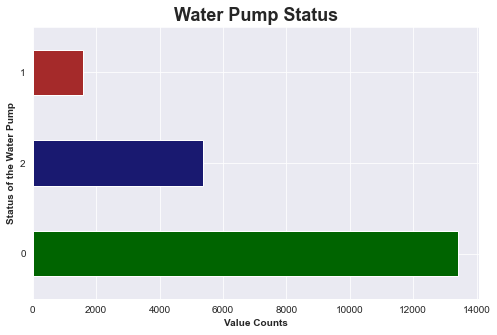

In [6]:
#Bar Graph for the status_group of Water Pump
df['target'].value_counts(ascending=False).plot(kind='barh', figsize=(8,5), color=['darkgreen','midnightblue','brown'])
plt.title("Water Pump Status", fontweight='bold', fontsize=18)
plt.xlabel('Value Counts',fontweight='bold',fontsize=10)
plt.ylabel('Status of the Water Pump',fontweight='bold',fontsize=10);

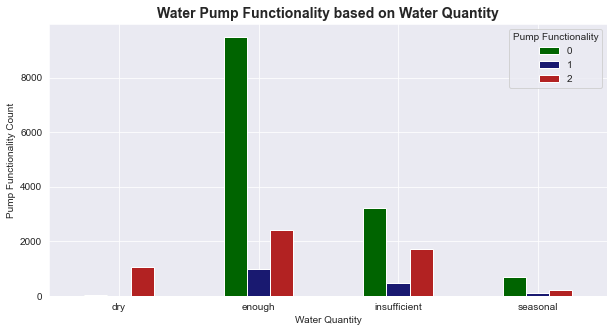

In [7]:
#Waterpump functionality
qty_df = df.groupby('quantity')['target'].value_counts(ascending=True).unstack()
qty_df.plot(kind='bar', color=['darkgreen','midnightblue','firebrick'], figsize=(10,5))
plt.xlabel("Water Quantity")
plt.xticks(rotation=0)
plt.ylabel("Pump Functionality Count")
plt.title('Water Pump Functionality based on Water Quantity', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Pump Functionality');

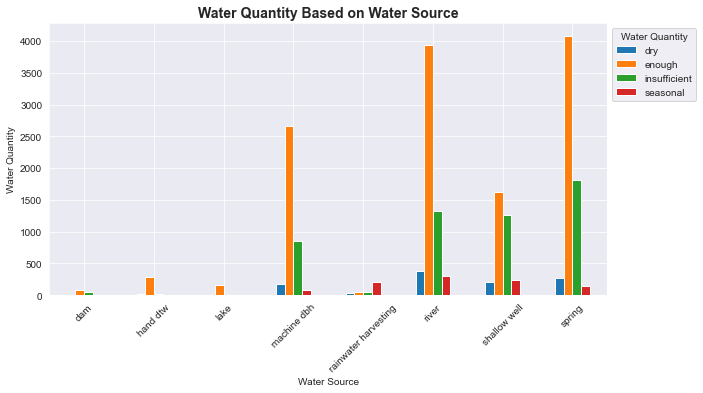

In [8]:
#Water Source
source_df = df.groupby('source')['quantity'].value_counts(ascending=False).unstack()
source_df.plot(kind='bar', figsize=(10,5))
plt.xlabel("Water Source")
plt.xticks(rotation=45)
plt.ylabel("Water Quantity")
plt.title('Water Quantity Based on Water Source', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Water Quantity');

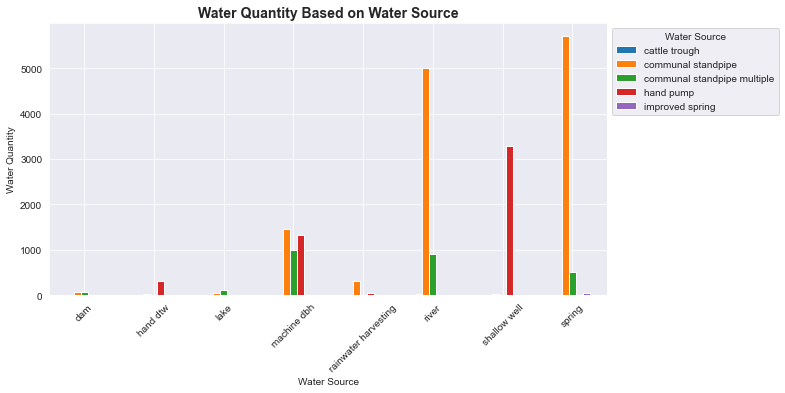

In [9]:
#WaterSource
source_df = df.groupby('source')['waterpoint_type'].value_counts(ascending=False).unstack()
source_df.plot(kind='bar', figsize=(10,5))
plt.xlabel("Water Source")
plt.xticks(rotation=45)
plt.ylabel("Water Quantity")
plt.title('Water Quantity Based on Water Source', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.0, 1.0), title='Water Source');

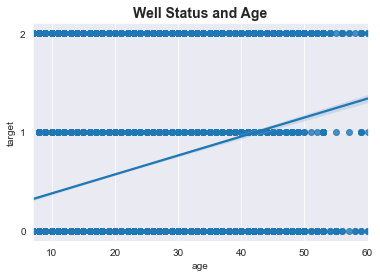

In [10]:
# definitely a strong relationship
fig, ax = plt.subplots(1)
sns.regplot(x='age', y='target', data=df, ax=ax)
ax.set_yticks([0, 1, 2])
plt.title('Well Status and Age', fontsize=14, fontweight='bold');

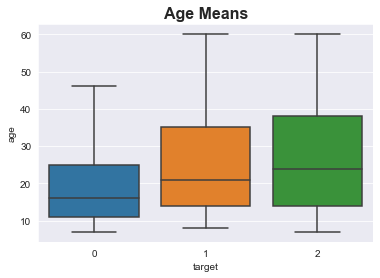

In [11]:
sns.boxplot(x='target',y='age', data=df, showfliers=False)
plt.title('Age Means', fontsize=16, fontweight='bold');

## Visualize Map

In [12]:
import contextily as ctx
import geopandas

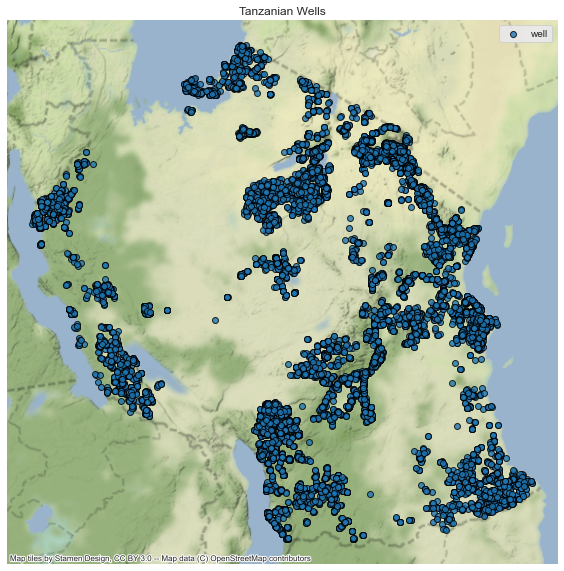

In [13]:
# create geopandas frames
gdf = geopandas.GeoDataFrame(
    df.copy(), geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

gdf = gdf.to_crs(epsg=3857)

# map the features using their geo coordinates
all_wells = gdf.plot(figsize=(10, 10), alpha=0.8, edgecolor='k', label='well')
plt.title('Tanzanian Wells')
plt.legend()
ctx.add_basemap(all_wells, source=ctx.providers.Stamen.TerrainBackground)
all_wells.set_axis_off()

WOW outliers. Some of the columns have missing coordinates.

In [14]:
gdf = gdf[gdf['longitude'] != 0]

### Wells by Status

In [15]:
gdf['target'].value_counts()

0    13412
2     5380
1     1579
Name: target, dtype: int64

In [16]:
functional_gdf = gdf[gdf['target'] == 0]
non_functional_gdf = gdf[gdf['target'] == 2]
needs_repair_gdf = gdf[gdf['target'] == 1]

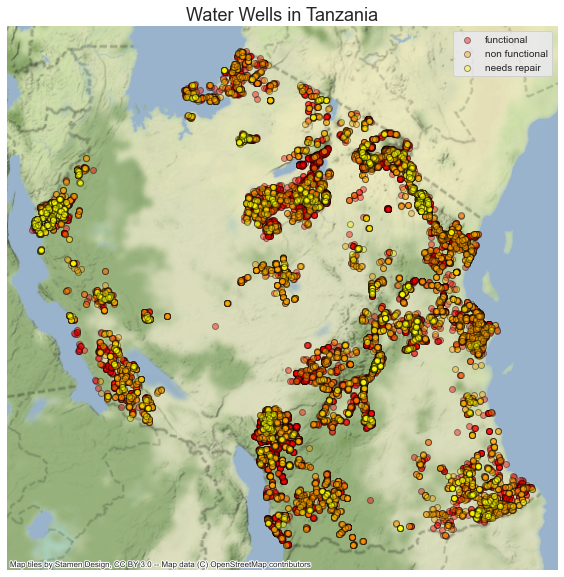

In [17]:
# map the features using their geo coordinates
wells_ax = functional_gdf.plot(figsize=(10, 10), alpha=0.4, edgecolor='k', label='functional', color='red')
wells_ax = non_functional_gdf.plot(ax=wells_ax, figsize=(10, 10), alpha=0.4, edgecolor='k', label='non functional', color='orange')
wells_ax = needs_repair_gdf.plot(ax=wells_ax, figsize=(10, 10), alpha=0.4, edgecolor='k', label='needs repair', color='yellow')

plt.legend()
plt.title('Water Wells in Tanzania', fontsize=18)
ctx.add_basemap(wells_ax, source=ctx.providers.Stamen.TerrainBackground)
wells_ax.set_axis_off()

### Wells by Year

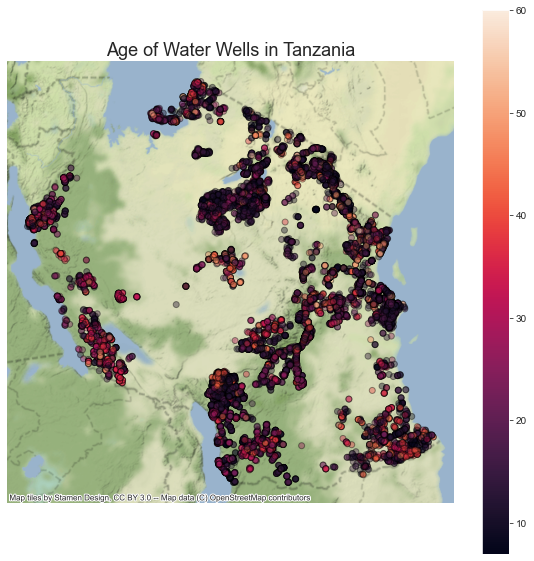

In [18]:
# map the features using their geo coordinates
wells_ax = gdf.plot(column='age', figsize=(10, 10), alpha=0.4, edgecolor='k', legend=True)
plt.title('Age of Water Wells in Tanzania', fontsize=18)
ctx.add_basemap(wells_ax, source=ctx.providers.Stamen.TerrainBackground)
wells_ax.set_axis_off()

## Pandas Profile

In [19]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", html= {'style': { 'full_width': True } });

In [20]:
profile

### Interpolating gps_height from lat and long

In [21]:
df.sort_values(['latitude', 'longitude'])[['gps_height', 'latitude', 'longitude']].head(3)

gps_height   latitude  longitude
27708         568 -11.566805  36.465277
6076         1240 -11.564509  35.026847
1316         1247 -11.564324  35.026405

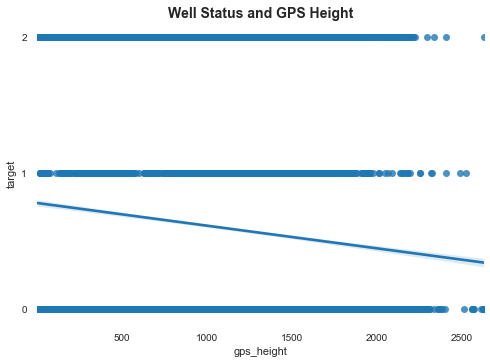

In [22]:
# definitely a strong relationship
fig, ax = plt.subplots(1)
sns.regplot(x='gps_height', y='target', data=df[(df['gps_height'] != 0)], ax=ax)
ax.set_yticks([0, 1, 2])
plt.title('Well Status and GPS Height', fontsize=14, fontweight='bold');